
# Decision Tree Classification


## Importing the libraries

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Start stopwatch

In [2]:

from time import process_time
time_start = process_time() 


## Import the dataset

In [3]:

X = pd.read_csv('/Users/rafavarela/Projects/MLhub/data/classification/features.csv')
y = pd.read_csv('/Users/rafavarela/Projects/MLhub/data/classification/labels.csv')


### Categorize dataset

In [4]:
def categorize_column(dataframe, category_threshold, column):
    
    uniq = dataframe[column].unique()
    if len(uniq) <= category_threshold:
        dataframe[column] = dataframe[column].astype('category').cat.codes
        

def categorize_dataframe(dataframe, category_threshold):
    for c in dataframe.columns:
        categorize_column(dataframe, category_threshold, c)
        
categorize_dataframe(X, 10)
categorize_dataframe(y, 10)
X = X.values
y = y.values


## Splitting the dataset into the Training set and Test set

In [5]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.1,
                        train_size=None,
                        random_state=0,
                        shuffle=0,
                        stratify=X if "None" == "features" else y if "None" == "labels" else None)


## Training the Simple Decision Tree model on the Training set

In [6]:

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="entropy", 
                            splitter="best", 
                            max_depth=None, 
                            min_samples_split= 2,
                            min_samples_leaf= 1,
                            min_weight_fraction_leaf= 0.0,
                            max_features=None if "None".isnumeric() or "None" == "None" else "None",
                            random_state= None,
                            max_leaf_nodes= None,
                            min_impurity_decrease= 0.0,
                            ccp_alpha= 0.0)
classifier.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy')

## Predicting the Test set results

In [7]:

y_pred = classifier.predict(X_test)


## Evaluating the Model Performance

Accuracy Score: 0.85
Precision Score: 0.6
Recall Score: 0.8660254037844386
F1 Score: 0.6666666666666665


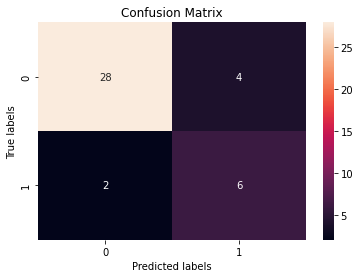

Elapsed CPU Time: 0.68 seconds


In [8]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix
import seaborn as sns

acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)**0.5
f1 = f1_score(y_test, y_pred)
print(f'Accuracy Score: {acc}')
print(f'Precision Score: {precision}')
print(f'Recall Score: {recall}')
print(f'F1 Score: {f1}')

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm)           
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');           
plt.show()

time_stop = process_time()
cpu_time = round(time_stop - time_start, 2)
print(f'Elapsed CPU Time: {cpu_time} seconds')


## Saving Model Statistics

In [9]:

import os
import json

path = 'statistics'
if not os.path.exists(path):
    os.mkdir(path)

stats = {
    "Accuracy Score": acc,
    "Precision Score": precision,
    "Recall Score": recall,
    "F1 Score": f1,
    "cpu time": cpu_time,
    "predicted": y_pred.flatten().tolist(), 
    "real": y_test.flatten().tolist()
}

with open(os.path.join(path, "tree2 classifier.json"), "w") as f:
    json.dump(stats, f, ensure_ascii=False, indent=4)
